In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
data = pd.read_csv("drive/My Drive/transaction_data.csv")

### ***EDA***

In [ ]:
data.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [ ]:
data.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,1.083818e+06,1.083818e+06,1.083818e+06,1.083818e+06,1.083818e+06
mean,2.410162e+05,6.159417e+06,6.582687e+05,2.865675e+01,9.498798e+00
std,1.423364e+05,1.476341e+05,4.526314e+05,6.542432e+02,2.308139e+03
min,-1.000000e+00,5.900015e+06,-1.000000e+00,-2.429850e+05,-1.526564e+04
25%,2.593920e+05,6.026856e+06,4.609080e+05,3.000000e+00,1.730000e+00
50%,3.020220e+05,6.166611e+06,4.752930e+05,9.000000e+00,2.880000e+00
75%,3.413550e+05,6.289569e+06,4.889430e+05,3.000000e+01,5.700000e+00
max,3.840270e+05,6.397457e+06,1.894494e+06,2.429850e+05,1.696285e+06


In [ ]:
data.nunique()

UserId                     4373
TransactionId             25900
TransactionTime           23260
ItemCode                   3407
ItemDescription            4223
NumberOfItemsPurchased      722
CostPerItem                1631
Country                      38
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083818 entries, 0 to 1083817
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   UserId                  1083818 non-null  int64  
 1   TransactionId           1083818 non-null  int64  
 2   TransactionTime         1083818 non-null  object 
 3   ItemCode                1083818 non-null  int64  
 4   ItemDescription         1080910 non-null  object 
 5   NumberOfItemsPurchased  1083818 non-null  int64  
 6   CostPerItem             1083818 non-null  float64
 7   Country                 1083818 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 66.2+ MB


# *Data Pre-Processing*


## TransactionTime

Converting TransactionTime column to datetime

In [ ]:
data['TransactionTime'] = pd.to_datetime(data['TransactionTime'])
data['Date'] = data['TransactionTime'].dt.date
data['Time'] = data['TransactionTime'].dt.time

/usr/local/lib/python3.6/dist-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [ ]:
# Now that we have different columns for time and date the TransactionTime column is redundant. So we will drop it.
data.drop(['TransactionTime'], axis=1, inplace=True)
data.head()

,UserId,TransactionId,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Date,Time
0,278166,6355745,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,2019-02-02,12:50:00
1,337701,6283376,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,2018-12-26,09:06:00
2,267099,6385599,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,2019-02-15,09:45:00
3,380478,6044973,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,2018-06-22,07:14:00
4,-1,6143225,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom,2018-09-10,11:58:00


In [ ]:
data['Date'] = data['Date'].astype(str)
data[data['Date']>'2019-02-28']

,UserId,TransactionId,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Date,Time
150,-1,5914326,446418,VICTORIAN SEWING BOX LARGE,3,35.18,United Kingdom,2028-02-18,14:36:00
151,-1,5914040,445872,STRAWBERRY CERAMIC TRINKET BOX,3,0.00,United Kingdom,2028-02-18,11:31:00
241,366870,5912049,473613,PLASTERS IN TIN SKULLS,36,2.28,United Kingdom,2028-02-18,05:57:00
248,-1,5914073,464289,FULL ENGLISH BREAKFAST PLATE,3,10.52,United Kingdom,2028-02-18,11:34:00
281,-1,5914326,1764126,MAGIC TREE -PAPER FLOWERS,3,2.30,United Kingdom,2028-02-18,14:36:00
...,...,...,...,...,...,...,...,...,...
1083129,369411,5914106,451164,CHICK GREY HOT WATER BOTTLE,3,4.77,United Kingdom,2028-02-18,11:39:00
1083339,276633,5913842,482181,JAM MAKING SET PRINTED,3,2.01,United Kingdom,2028-02-18,10:30:00
1083371,369411,5914106,444486,COOK WITH WINE METAL SIGN,6,2.70,United Kingdom,2028-02-18,11:39:00
1083507,-1,5914062,446418,VICTORIAN SEWING BOX LARGE,6,35.18,United Kingdom,2028-02-18,11:33:00


Some rows have dates with year as 2028 which is not possible. So we will replace those with the max possible date for the year which is 2019

In [ ]:
data.replace(to_replace='2028-02-18',value='2019-02-18',inplace=True)

In [ ]:
data

,UserId,TransactionId,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Date,Time
0,278166,6355745,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,2019-02-02,12:50:00
1,337701,6283376,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,2018-12-26,09:06:00
2,267099,6385599,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,2019-02-15,09:45:00
3,380478,6044973,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,2018-06-22,07:14:00
4,-1,6143225,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom,2018-09-10,11:58:00
...,...,...,...,...,...,...,...,...,...
1083813,313131,6040298,437976,DENIM PATCH PURSE PINK BUTTERFLY,30,2.28,EIRE,2018-06-18,09:18:00
1083814,295743,6387117,484113,RECYCLED ACAPULCO MAT PINK,6,11.39,United Kingdom,2019-02-16,09:14:00
1083815,-1,6361817,497595,DOILY THANK YOU CARD,15,1.15,United Kingdom,2019-02-05,05:26:00
1083816,324765,5945500,470883,REGENCY CAKESTAND 3 TIER,48,15.12,United Kingdom,2018-03-23,06:26:00


## TransactionId

In [ ]:
data['TransactionId'].describe()

count    1.083818e+06
mean     6.159417e+06
std      1.476341e+05
min      5.900015e+06
25%      6.026856e+06
50%      6.166611e+06
75%      6.289569e+06
max      6.397457e+06
Name: TransactionId, dtype: float64

It seems that a lot of duplicate rows are present in the current dataset. So we will compare rows on all columns and drop the duplicate rows.

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data

,UserId,TransactionId,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Date,Time
0,278166,6355745,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,2019-02-02,12:50:00
1,337701,6283376,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,2018-12-26,09:06:00
2,267099,6385599,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,2019-02-15,09:45:00
3,380478,6044973,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,2018-06-22,07:14:00
4,-1,6143225,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom,2018-09-10,11:58:00
...,...,...,...,...,...,...,...,...,...
1080730,-1,6345240,487116,VINTAGE LEAF MAGNETIC NOTEPAD,3,4.55,United Kingdom,2019-01-28,11:23:00
1081224,342636,6268328,481761,CHRISTMAS LIGHTS 10 REINDEER,24,11.73,United Kingdom,2018-12-18,09:48:00
1081271,374577,6277348,478506,CUSHION COVER PINK UNION JACK,9,8.22,United Kingdom,2018-12-23,10:34:00
1081376,378861,5973099,469707,CHILDRENS APRON SPACEBOY DESIGN,12,2.70,United Kingdom,2018-04-16,09:11:00


## CostPerItem

In [ ]:
data['TotalCost'] = data['NumberOfItemsPurchased'] * data['CostPerItem']
data.describe(include='all')

,UserId,TransactionId,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Date,Time,TotalCost
count,536572.000000,5.365720e+05,5.365720e+05,535118,536572.000000,5.365720e+05,536572,536572,536572,5.365720e+05
unique,NaN,NaN,NaN,4223,NaN,NaN,38,304,774,NaN
top,NaN,NaN,NaN,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,United Kingdom,2019-02-18,11:56:00,NaN
freq,NaN,NaN,NaN,2357,NaN,NaN,490233,5352,2623,NaN
mean,240163.453561,6.159156e+06,6.583921e+05,NaN,28.862127,9.560211e+00,NaN,NaN,NaN,1.510616e+02
std,142690.785461,1.475017e+05,4.528156e+05,NaN,657.432645,2.319590e+03,NaN,NaN,NaN,5.559951e+04
min,-1.000000,5.900015e+06,-1.000000e+00,NaN,-242985.000000,-1.526564e+04,NaN,NaN,NaN,-6.997968e+05
25%,-1.000000,6.026856e+06,4.609080e+05,NaN,3.000000,1.730000e+00,NaN,NaN,NaN,1.554000e+01
50%,301098.000000,6.166276e+06,4.752930e+05,NaN,9.000000,2.880000e+00,NaN,NaN,NaN,4.095000e+01
75%,341061.000000,6.288876e+06,4.889430e+05,NaN,30.000000,5.700000e+00,NaN,NaN,NaN,7.236000e+01


In [ ]:
total_cost_zero = data[data['TotalCost']==0]
total_cost_zero

,UserId,TransactionId,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Date,Time,TotalCost
148,-1,6108674,1780905,wet damaged,-288,0.0,United Kingdom,2018-08-14,07:12:00,-0.0
151,-1,5914040,445872,STRAWBERRY CERAMIC TRINKET BOX,3,0.0,United Kingdom,2019-02-18,11:31:00,0.0
322,-1,6314803,495159,NaN,9,0.0,United Kingdom,2019-01-14,11:15:00,0.0
432,-1,6173783,1428,ebay,-30,0.0,United Kingdom,2018-10-07,07:52:00,-0.0
668,-1,6268713,1890294,check,-36,0.0,United Kingdom,2018-12-18,11:16:00,-0.0
...,...,...,...,...,...,...,...,...,...,...
1039075,-1,5912874,471996,EMPIRE UNION JACK TV DINNER TRAY,3,0.0,United Kingdom,2019-02-18,07:48:00,0.0
1045017,-1,6068359,448455,NaN,270,0.0,United Kingdom,2018-07-15,08:38:00,0.0
1046355,-1,6040947,437241,NaN,27,0.0,United Kingdom,2018-06-18,13:32:00,0.0
1057814,-1,6272178,997584,NaN,216,0.0,United Kingdom,2018-12-19,11:50:00,0.0


If the TotalCost column of a row is 0 there's no relevant information that can be extracted from that in the current analysis. So we will drop the values.

In [ ]:
data.drop(total_cost_zero.index,inplace=True)
data

,UserId,TransactionId,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Date,Time,TotalCost
0,278166,6355745,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,2019-02-02,12:50:00,70.38
1,337701,6283376,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,2018-12-26,09:06:00,10.56
2,267099,6385599,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,2019-02-15,09:45:00,64.80
3,380478,6044973,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,2018-06-22,07:14:00,5.19
4,-1,6143225,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom,2018-09-10,11:58:00,10.20
...,...,...,...,...,...,...,...,...,...,...
1080730,-1,6345240,487116,VINTAGE LEAF MAGNETIC NOTEPAD,3,4.55,United Kingdom,2019-01-28,11:23:00,13.65
1081224,342636,6268328,481761,CHRISTMAS LIGHTS 10 REINDEER,24,11.73,United Kingdom,2018-12-18,09:48:00,281.52
1081271,374577,6277348,478506,CUSHION COVER PINK UNION JACK,9,8.22,United Kingdom,2018-12-23,10:34:00,73.98
1081376,378861,5973099,469707,CHILDRENS APRON SPACEBOY DESIGN,12,2.70,United Kingdom,2018-04-16,09:11:00,32.40


## NumberOfItemsPurchased

If the NumberOfItemsPurchased is less than zero for any row that might mean cancelled orders or returned items.

In [ ]:
data[data['NumberOfItemsPurchased']<0]

,UserId,TransactionId,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Date,Time,TotalCost
69,300909,6015757,466452,FOUR HOOK WHITE LOVEBIRDS,-3,2.90,United Kingdom,2018-05-29,14:14:00,-8.70
135,319683,6036228,470883,REGENCY CAKESTAND 3 TIER,-24,17.60,United Kingdom,2018-06-16,08:28:00,-422.40
329,321531,5925150,446418,VICTORIAN SEWING BOX LARGE,-3,15.12,United Kingdom,2018-02-24,11:05:00,-45.36
330,260715,6165940,488061,TREASURE TIN GYMKHANA DESIGN,-3,2.88,Australia,2018-09-30,08:26:00,-8.64
353,274869,6004240,470883,REGENCY CAKESTAND 3 TIER,-15,15.12,United Kingdom,2018-05-19,09:35:00,-226.80
...,...,...,...,...,...,...,...,...,...,...
1062524,-1,6018001,478800,ANTIQUE TALL SWIRLGLASS TRINKET POT,-12,5.18,United Kingdom,2018-06-01,12:14:00,-62.16
1067612,294714,6149209,487452,HEART WREATH DECORATION WITH BELL,-108,1.73,United Kingdom,2018-09-16,09:10:00,-186.84
1068116,369096,6381441,1785714,3 ROSE MORRIS BOXED CANDLES,-36,5.87,United Kingdom,2019-02-12,14:12:00,-211.32
1076081,333648,6242852,443856,PAINTED METAL PEARS ASSORTED,-24,2.34,United Kingdom,2018-12-03,05:44:00,-56.16


##UserId

In [ ]:
unknown_data = data[data['UserId']==-1]
unknown_data

,UserId,TransactionId,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Date,Time,TotalCost
4,-1,6143225,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom,2018-09-10,11:58:00,10.20
7,-1,6143225,447867,SKULLS WRITING SET,120,1.15,United Kingdom,2018-09-10,11:58:00,138.00
13,-1,6058140,435225,LUNCH BAG RED RETROSPOT,60,6.85,United Kingdom,2018-07-02,07:33:00,411.00
17,-1,6288843,489594,VINTAGE CHRISTMAS TABLECLOTH,3,34.45,United Kingdom,2018-12-30,12:58:00,103.35
23,-1,6388019,490329,ROLL WRAP VINTAGE CHRISTMAS,30,3.40,United Kingdom,2019-02-16,13:24:00,102.00
...,...,...,...,...,...,...,...,...,...,...
1075673,-1,6164774,1776516,BISCUITS SMALL BOWL LIGHT BLUE,12,1.15,United Kingdom,2018-09-29,11:56:00,13.80
1076634,-1,5933983,1892394,SUMMER DAISIES BAG CHARM,3,3.47,United Kingdom,2018-02-28,13:08:00,10.41
1077690,-1,6232347,470904,ENAMEL BREAD BIN CREAM,3,34.45,United Kingdom,2018-11-25,09:29:00,103.35
1080730,-1,6345240,487116,VINTAGE LEAF MAGNETIC NOTEPAD,3,4.55,United Kingdom,2019-01-28,11:23:00,13.65


Rows with unknown ***UserId*** can't be linked to any user and during clustering may count as same user.So we will drop the rows with ***UserId*** as -1

In [ ]:
data.drop(unknown_data.index,inplace=True)

In [ ]:
data

,UserId,TransactionId,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Date,Time,TotalCost
0,278166,6355745,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,2019-02-02,12:50:00,70.38
1,337701,6283376,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,2018-12-26,09:06:00,10.56
2,267099,6385599,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,2019-02-15,09:45:00,64.80
3,380478,6044973,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,2018-06-22,07:14:00,5.19
5,285957,6307136,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom,2019-01-11,09:50:00,42.24
...,...,...,...,...,...,...,...,...,...,...
1080031,324303,6204462,487452,HEART WREATH DECORATION WITH BELL,108,1.73,United Kingdom,2018-11-03,08:52:00,186.84
1080203,374661,5911455,448581,LOVE LARGE WOOD LETTERS,3,17.60,United Kingdom,2018-02-17,10:51:00,52.80
1081224,342636,6268328,481761,CHRISTMAS LIGHTS 10 REINDEER,24,11.73,United Kingdom,2018-12-18,09:48:00,281.52
1081271,374577,6277348,478506,CUSHION COVER PINK UNION JACK,9,8.22,United Kingdom,2018-12-23,10:34:00,73.98


##Country

In [ ]:
data['Country'].value_counts()

United Kingdom          356671
Germany                   9478
France                    8474
EIRE                      7473
Spain                     2527
Netherlands               2367
Belgium                   2069
Switzerland               1876
Portugal                  1471
Australia                 1255
Norway                    1085
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     610
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     246
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         57
Lebanon                     45
Lithuani

Replacing Unspecified country with the most frequent value of the attribute in the dataset.

In [ ]:
data.loc[data['Country'] == 'Unspecified', 'Country'] = 'United Kingdom'

In [ ]:
data['Country'] = data.Country.astype('category')

## Recency, Frequency, and Monetary (RFM) Segmentation

### Calculating RFM Values

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
earliest_date = data['Date'].min()
end_date = data['Date'].max()

print("Actual Start Date: {}, Actual End Date: {}".format(earliest_date, end_date))

start_date = end_date - pd.to_timedelta(364, unit='d')
df_rfm = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

print("RFM Start Date: {}, RFM End Date: {}".format(
    df_rfm['Date'].min(), df_rfm['Date'].max()))

Actual Start Date: 2018-02-12 00:00:00, Actual End Date: 2019-02-20 00:00:00
RFM Start Date: 2018-02-21 00:00:00, RFM End Date: 2019-02-20 00:00:00


In [ ]:
snapshot_date = end_date + dt.timedelta(days=1)
df_rfm = df_rfm.groupby(['UserId']).agg({
    'Date': lambda x: (snapshot_date - x.max()).days,
    'TransactionId': 'count',
    'TotalCost': 'sum'})
df_rfm.rename(columns={'Date': 'Recency',
                       'TransactionId': 'Frequency',
                       'TotalCost': 'MonetaryValue'}, inplace=True)
print(df_rfm.head())

        Recency  Frequency  MonetaryValue
UserId                                   
259266      326          2           0.00
259287        3        182       17879.70
259308       76         31        7481.52
259329       19         73        7285.92
259350      311         17        1387.20


In [ ]:
def get_quantile(df, column, start_n_quantiles, end_n_quantiles, step=1):

    category_label = range(start_n_quantiles, end_n_quantiles, step)
    df['rank'] = df[column].rank(method='first')
    quantiles = pd.qcut(df['rank'], q=abs(
        end_n_quantiles - start_n_quantiles), labels=category_label)

    df = df.assign(name=quantiles.values)

    new_column_name = column + '_Q'

    return df.rename(columns={"name": new_column_name})

In [ ]:
df_rfm_quantile = df_rfm.copy()

df_rfm_quantile = get_quantile(df_rfm_quantile, 'Recency', 4, 0, -1)
df_rfm_quantile = get_quantile(df_rfm_quantile, 'Frequency', 1, 5)
df_rfm_quantile = get_quantile(df_rfm_quantile, 'MonetaryValue', 1, 5)

df_rfm_quantile.head()

,Recency,Frequency,MonetaryValue,rank,Recency_Q,Frequency_Q,MonetaryValue_Q
UserId,,,,,,,
259266,326,2,0.00,44.0,1,1,1
259287,3,182,17879.70,3998.0,4,4,4
259308,76,31,7481.52,3365.0,2,2,4
259329,19,73,7285.92,3334.0,3,3,4
259350,311,17,1387.20,1301.0,1,1,2


Reducing skewness for K-means clustering.

In [ ]:
from scipy import stats
def check_skew(df, column):
    skew = stats.skew(df[column])
    skewtest = stats.skewtest(df[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))

Recency's: Skew: 1.254268639397964, : SkewtestResult(statistic=26.617711041167276, pvalue=4.2343478025891405e-156)
Frequency's: Skew: 18.0339392634351, : SkewtestResult(statistic=83.11622012476613, pvalue=0.0)
MonetaryValue's: Skew: 21.942943110583723, : SkewtestResult(statistic=87.41958357531739, pvalue=0.0)


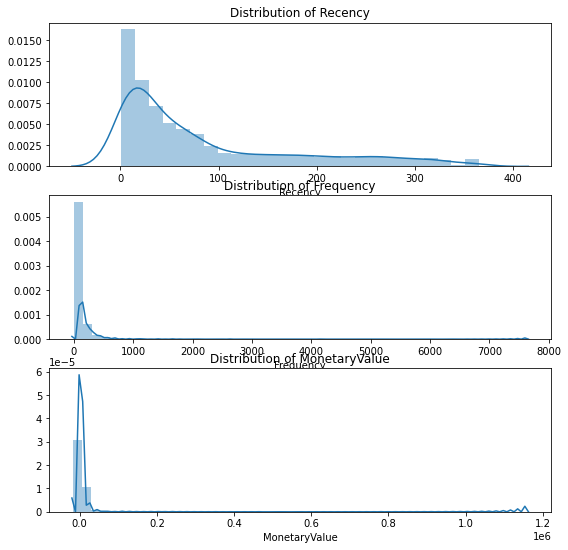

In [ ]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(df_rfm,'Recency')

plt.subplot(3, 1, 2)
check_skew(df_rfm,'Frequency')

plt.subplot(3, 1, 3)
check_skew(df_rfm,'MonetaryValue')

In [ ]:
df_rfm_log = df_rfm.copy()

df_rfm_log['MonetaryValue'] = (df_rfm_log['MonetaryValue'] - df_rfm_log['MonetaryValue'].min()) + 1

df_rfm_log.describe()

,Recency,Frequency,MonetaryValue
count,4300.000000,4300.000000,4.300000e+03
mean,86.822791,90.270698,2.549792e+04
std,94.367784,224.755507,3.397330e+04
min,1.000000,1.000000,1.000000e+00
25%,17.000000,17.000000,1.895183e+04
50%,47.000000,41.000000,2.041254e+04
75%,131.250000,98.000000,2.432683e+04
max,365.000000,7621.000000,1.177985e+06


Recency's: Skew: -0.44967695498257315, : SkewtestResult(statistic=-11.522650061793556, pvalue=1.0144226370197837e-30)
Frequency's: Skew: -0.23526270715715877, : SkewtestResult(statistic=-6.225303008697333, pvalue=4.806262000464298e-10)
MonetaryValue's: Skew: -1.5422139062813287, : SkewtestResult(statistic=-30.525501786169006, pvalue=1.1957877709748989e-204)


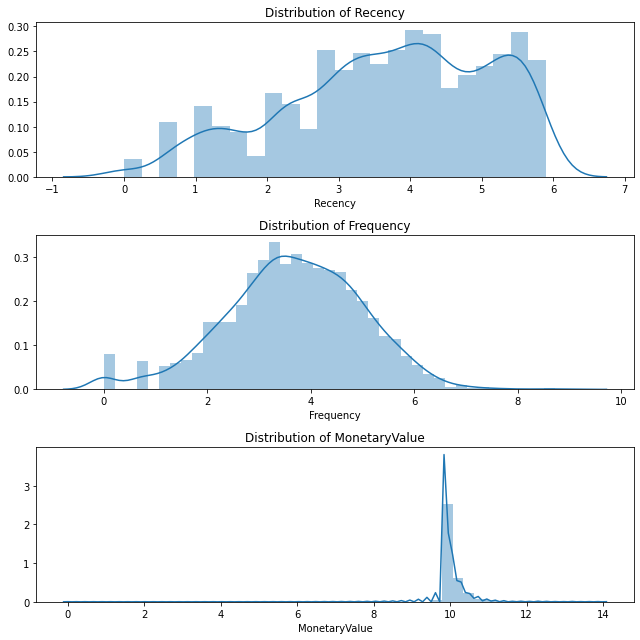

In [ ]:
df_rfm_log = np.log(df_rfm_log)
plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
check_skew(df_rfm_log,'Recency')

plt.subplot(3, 1, 2)
check_skew(df_rfm_log,'Frequency')

plt.subplot(3, 1, 3)
check_skew(df_rfm_log,'MonetaryValue')

plt.tight_layout()

In [ ]:
scaler = StandardScaler()
scaler.fit(df_rfm_log)
df_rfm_normal = scaler.transform(df_rfm_log)
df_rfm_normal = pd.DataFrame(df_rfm_normal, index=df_rfm_log.index, columns=df_rfm_log.columns)
df_rfm_normal.describe().round(3)

,Recency,Frequency,MonetaryValue
count,4300.000,4300.000,4300.000
mean,-0.000,-0.000,-0.000
std,1.000,1.000,1.000
min,-2.613,-2.768,-27.130
25%,-0.613,-0.630,-0.498
50%,0.104,0.035,-0.297
75%,0.829,0.693,0.177
max,1.551,3.979,10.669


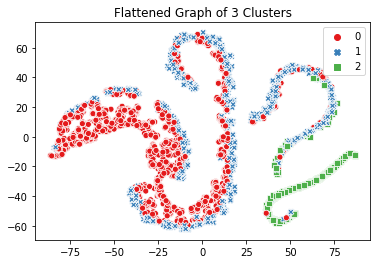

In [ ]:
from sklearn.manifold import TSNE

    
kmeans = KMeans(n_clusters = 3, random_state = 1)
kmeans.fit(df_rfm_normal)
cluster_labels = kmeans.labels_
df_new = df_rfm.assign(Cluster = cluster_labels)
model = TSNE(random_state=1)
transformed = model.fit_transform(df_new)
plt.title('Flattened Graph of 3 Clusters')
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")

In [ ]:
def rfm_values(df):
    
    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'MonetaryValue': ['mean', 'count']
    }).round(0)
    
    return df_new
rfm_values(df_new)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         153.0      23.0        1826.0  2028
1          30.0      95.0        5532.0  1869
2          13.0     410.0       47807.0   403

In [ ]:
df_new.drop(['Recency','Frequency','MonetaryValue'],axis=1,inplace=True)
df_new

,Cluster
UserId,
259266,0
259287,2
259308,0
259329,1
259350,0
...,...
383880,0
383901,0
383922,1


In [ ]:
df_new[df_new['Cluster']==0].to_csv('cluster0.csv')

### Cluster 0 consists of Users with less recent transactions , a low frequency and low monetary value and consists of 2028 users.

In [ ]:
df_new[df_new['Cluster']==1].to_csv('cluster1.csv')

### Cluster 1 consists of Users with recent transactions , a moderate frequency and moderate monetary value and consists of 1869 users.

In [ ]:
df_new[df_new['Cluster']==2].to_csv('cluster2.csv')

### Cluster 2 consists of Users with very recent transactions , a high frequency and high monetary value and consists of 403 users.